### 자료분석: 아파트(매매)_실거래가_20230516162628.csv

##### 코랩마운트, 파일 불러오기

In [1]:
#코랩 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#csv 불러오기
#경로부분 직접 수정

import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

#filename = '/content/drive/MyDrive/저장용/아파트(매매)_실거래가_대구2005.csv'
#data1 = pd.read_csv(filename, index_col = False)
#filename = '/content/drive/MyDrive/저장용/아파트(매매)_실거래가_대구2006.csv'
#data2 = pd.read_csv(filename, index_col = False)
#df = pd.concat([data1, data2], ignore_index=True)

filename = '/content/drive/MyDrive/저장용/아파트(매매)_실거래가_대구2006.csv'
df= pd.read_csv(filename, index_col = False)

##### 행정동 별 그룹핑

In [3]:
#행정동 확인
df['시군구'].unique()

array(['대구광역시 남구 대명동', '대구광역시 남구 봉덕동', '대구광역시 남구 이천동', '대구광역시 달서구 감삼동',
       '대구광역시 달서구 대곡동', '대구광역시 달서구 대천동', '대구광역시 달서구 도원동', '대구광역시 달서구 두류동',
       '대구광역시 달서구 본동', '대구광역시 달서구 본리동', '대구광역시 달서구 상인동', '대구광역시 달서구 성당동',
       '대구광역시 달서구 송현동', '대구광역시 달서구 신당동', '대구광역시 달서구 용산동', '대구광역시 달서구 월성동',
       '대구광역시 달서구 유천동', '대구광역시 달서구 이곡동', '대구광역시 달서구 장기동', '대구광역시 달서구 죽전동',
       '대구광역시 달서구 진천동', '대구광역시 달서구 파호동', '대구광역시 달서구 호산동',
       '대구광역시 달성군 가창면 용계리', '대구광역시 달성군 논공읍 남리', '대구광역시 달성군 논공읍 북리',
       '대구광역시 달성군 다사읍 매곡리', '대구광역시 달성군 다사읍 서재리', '대구광역시 달성군 다사읍 죽곡리',
       '대구광역시 달성군 옥포읍 교항리', '대구광역시 달성군 옥포읍 본리리', '대구광역시 달성군 현풍읍 상리',
       '대구광역시 달성군 현풍읍 성하리', '대구광역시 달성군 현풍읍 원교리', '대구광역시 달성군 현풍읍 중리',
       '대구광역시 달성군 화원읍 구라리', '대구광역시 달성군 화원읍 명곡리', '대구광역시 달성군 화원읍 본리리',
       '대구광역시 달성군 화원읍 설화리', '대구광역시 달성군 화원읍 성산리', '대구광역시 달성군 화원읍 천내리',
       '대구광역시 동구 각산동', '대구광역시 동구 검사동', '대구광역시 동구 도동', '대구광역시 동구 동호동',
       '대구광역시 동구 방촌동', '대구광역시 동구 봉무동', '대구광역시 동구 불로동', '대구광역시 동구 서호동',
       '대구광역시 

##### 대조군 설정

In [4]:
grouped = df.groupby(df['시군구'])
df1=grouped.get_group("대구광역시 수성구 만촌동")
df1

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
15391,대구광역시 수성구 만촌동,860-4,860,4,담티힐즈,84.5614,200612,1,"18,000",8,2003,달구벌대로 2680,NaN,-,-
15392,대구광역시 수성구 만촌동,1050-2,1050,2,동진,47.7600,200603,8,"5,000",1,1984,청호로96길 12,NaN,-,-
15393,대구광역시 수성구 만촌동,1050-2,1050,2,동진,40.7600,200603,15,"6,600",2,1984,청호로96길 12,NaN,-,-
15394,대구광역시 수성구 만촌동,1050-2,1050,2,동진,54.9700,200612,4,"8,300",3,1984,청호로96길 12,NaN,-,-
15395,대구광역시 수성구 만촌동,245,245,0,럭키골든,71.7600,200606,19,"8,000",4,1985,효행로 24,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15783,대구광역시 수성구 만촌동,860,860,0,우방금탑,67.1500,200611,18,"11,700",4,1986,교학로 3,NaN,-,-
15784,대구광역시 수성구 만촌동,862-2,862,2,청구매일,84.9000,200604,1,"15,250",3,1990,달구벌대로530길 88,NaN,-,-
15785,대구광역시 수성구 만촌동,862-2,862,2,청구매일,84.9000,200605,20,"14,600",5,1990,달구벌대로530길 88,NaN,-,-
15786,대구광역시 수성구 만촌동,862-2,862,2,청구매일,84.9000,200610,24,"14,000",1,1990,달구벌대로530길 88,NaN,-,-


In [5]:
df2=grouped.get_group("대구광역시 북구 산격동")
df2

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
12991,대구광역시 북구 산격동,793-49,793,49,금오,47.675,200604,21,"5,200",3,1982,연암로25길 11,NaN,-,-
12992,대구광역시 북구 산격동,793-49,793,49,금오,47.850,200606,15,"4,100",4,1982,연암로25길 11,NaN,-,-
12993,대구광역시 북구 산격동,762-2,762,2,동성맨션,61.950,200601,3,"5,760",4,1989,신천동로 936,NaN,-,-
12994,대구광역시 북구 산격동,762-2,762,2,동성맨션,83.370,200608,9,"5,000",4,1989,신천동로 936,NaN,-,-
12995,대구광역시 북구 산격동,762-2,762,2,동성맨션,83.370,200609,1,"7,000",1,1989,신천동로 936,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13182,대구광역시 북구 산격동,481-52,481,52,수정,61.990,200610,18,"9,500",3,1983,대불로5길 16,NaN,-,-
13183,대구광역시 북구 산격동,481-52,481,52,수정,47.080,200610,20,"5,100",3,1983,대불로5길 16,NaN,-,-
13184,대구광역시 북구 산격동,481-52,481,52,수정,47.080,200612,16,"6,450",1,1983,대불로5길 16,NaN,-,-
13185,대구광역시 북구 산격동,481-52,481,52,수정,57.320,200612,24,"8,500",4,1983,대불로5길 16,NaN,-,-


##### 제곱미터당 거래가로 변환

In [6]:
df1.dtypes

시군구          object
번지           object
본번            int64
부번            int64
단지명          object
전용면적(㎡)     float64
계약년월          int64
계약일           int64
거래금액(만원)     object
층             int64
건축년도          int64
도로명          object
해제사유발생일     float64
거래유형         object
중개사소재지       object
dtype: object

In [7]:
df1['거래금액(만원)'] = df1['거래금액(만원)'].str.replace(",", "")
df2['거래금액(만원)'] = df2['거래금액(만원)'].str.replace(",", "")

<ipython-input-7-3467990bfb56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['거래금액(만원)'] = df1['거래금액(만원)'].str.replace(",", "")
<ipython-input-7-3467990bfb56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['거래금액(만원)'] = df2['거래금액(만원)'].str.replace(",", "")


In [8]:
df1['거래금액(만원)'] = df1['거래금액(만원)'].astype(float)
df1['제곱미터당가격(만원)']=df1['거래금액(만원)']/df1['전용면적(㎡)']
df1

df2['거래금액(만원)'] = df2['거래금액(만원)'].astype(float)
df2['제곱미터당가격(만원)']=df2['거래금액(만원)']/df2['전용면적(㎡)']
df2

<ipython-input-8-1d88c59475f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['거래금액(만원)'] = df1['거래금액(만원)'].astype(float)
<ipython-input-8-1d88c59475f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['제곱미터당가격(만원)']=df1['거래금액(만원)']/df1['전용면적(㎡)']
<ipython-input-8-1d88c59475f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,제곱미터당가격(만원)
12991,대구광역시 북구 산격동,793-49,793,49,금오,47.675,200604,21,5200.0,3,1982,연암로25길 11,NaN,-,-,109.071841
12992,대구광역시 북구 산격동,793-49,793,49,금오,47.850,200606,15,4100.0,4,1982,연암로25길 11,NaN,-,-,85.684431
12993,대구광역시 북구 산격동,762-2,762,2,동성맨션,61.950,200601,3,5760.0,4,1989,신천동로 936,NaN,-,-,92.978208
12994,대구광역시 북구 산격동,762-2,762,2,동성맨션,83.370,200608,9,5000.0,4,1989,신천동로 936,NaN,-,-,59.973612
12995,대구광역시 북구 산격동,762-2,762,2,동성맨션,83.370,200609,1,7000.0,1,1989,신천동로 936,NaN,-,-,83.963056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13182,대구광역시 북구 산격동,481-52,481,52,수정,61.990,200610,18,9500.0,3,1983,대불로5길 16,NaN,-,-,153.250524
13183,대구광역시 북구 산격동,481-52,481,52,수정,47.080,200610,20,5100.0,3,1983,대불로5길 16,NaN,-,-,108.326253
13184,대구광역시 북구 산격동,481-52,481,52,수정,47.080,200612,16,6450.0,1,1983,대불로5길 16,NaN,-,-,137.000850
13185,대구광역시 북구 산격동,481-52,481,52,수정,57.320,200612,24,8500.0,4,1983,대불로5길 16,NaN,-,-,148.290300


##### 데이터 시각화-산점도

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [10]:
#plt 임포트, 한글폰트 설치후 런타임 재시작 필요

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [10, 8] # setting figure size

<ipython-input-11-1dcf3af7c3c0>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(1, 2, 1)


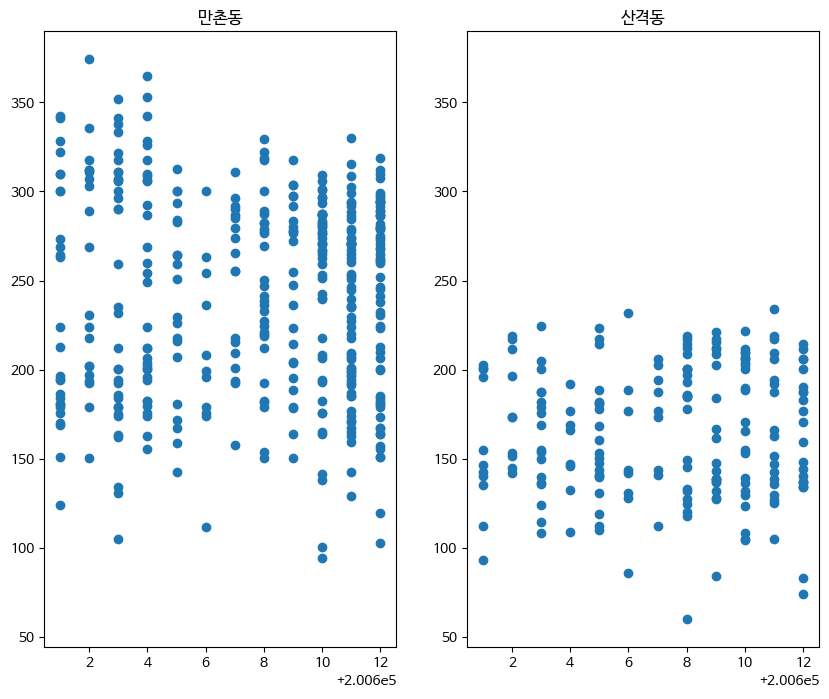

In [11]:
plt.xlabel('2006년')
plt.ylabel('제곱미터당 거래가(만원)')

ax1=plt.subplot(1, 2, 1)
plt.title('만촌동')
plt.plot(df1['계약년월'], df1['제곱미터당가격(만원)'], 'o')

ax2=plt.subplot(1, 2, 2, sharey=ax1)
plt.title('산격동')
plt.plot(df2['계약년월'], df2['제곱미터당가격(만원)'], 'o')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37fa723790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37fa723cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37fa7234f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f37fa758250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f37fa7584f0>,
 'means': []}

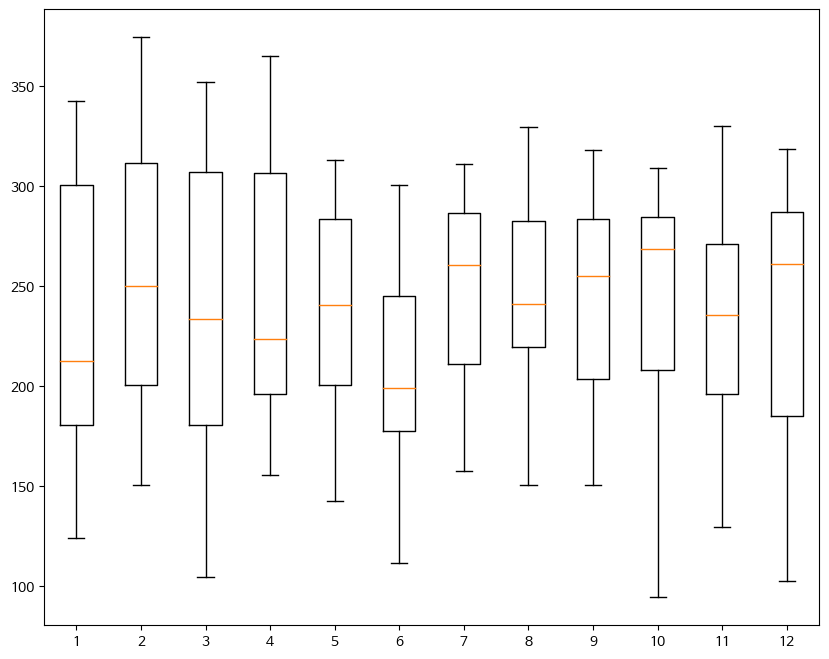

In [12]:
grouped = df1.groupby(df1['계약년월'])
stringtmp = [200601, 200602, 200603, 200604, 200605, 200606, 200607, 200608, 200609, 200610, 200611, 200612]
month=[[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(0,12):
  datatmp = grouped.get_group(stringtmp[i])
  month[i] = datatmp['제곱미터당가격(만원)']

plt.boxplot(month)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37fcf3c460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37fcf3c9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37fcf3c1c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f37fcf3cf10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f37fcf3d1b0>,
 'means': []}

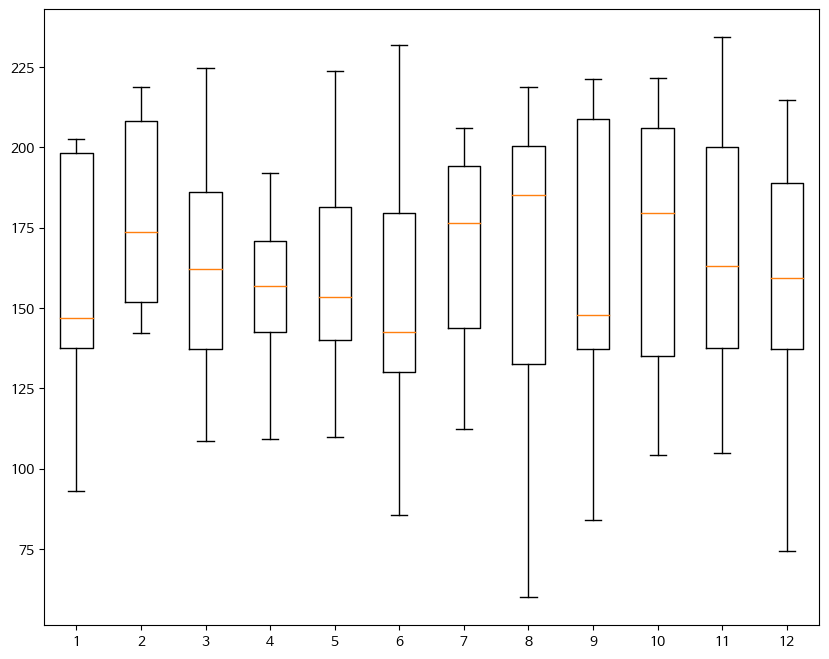

In [13]:
grouped = df2.groupby(df2['계약년월'])
stringtmp = [200601, 200602, 200603, 200604, 200605, 200606, 200607, 200608, 200609, 200610, 200611, 200612]
month2=[[],[],[],[],[],[],[],[],[],[],[],[]]

for i in range(0,12):
  datatmp = grouped.get_group(stringtmp[i])
  month2[i] = datatmp['제곱미터당가격(만원)']

plt.boxplot(month2)

<ipython-input-14-d6052d19181f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(1, 2, 1)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f37fa98f310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37fa98f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37fa98e260>,
 'medians': [<matplotlib.lines.Line2D at 0x7f37fa98fdc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f37fa9c80a0>,
 'means': []}

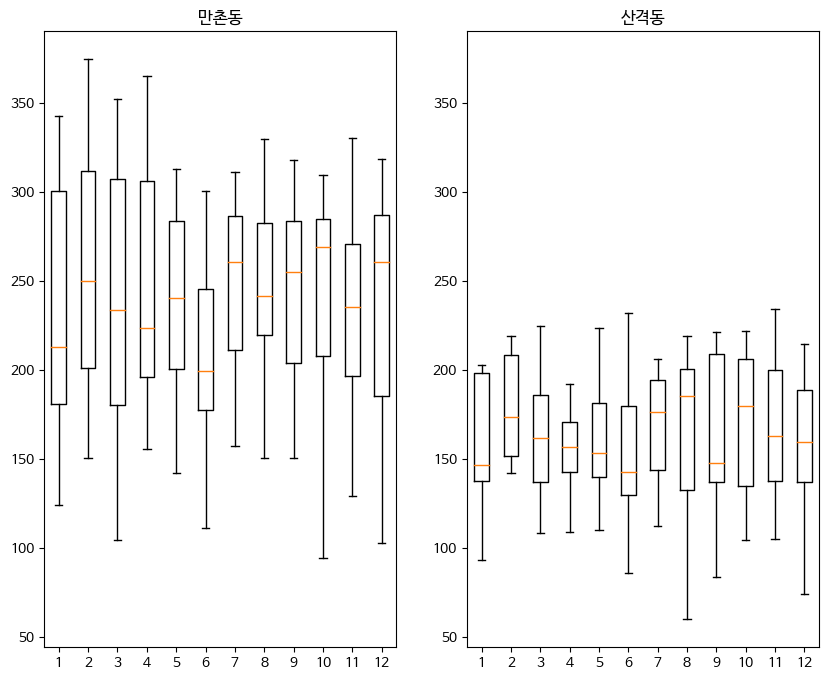

In [14]:
plt.xlabel('2006년')
plt.ylabel('제곱미터당 거래가(만원)')

ax1=plt.subplot(1, 2, 1)
plt.title('만촌동')
plt.boxplot(month)

ax2=plt.subplot(1, 2, 2, sharey=ax1)
plt.title('산격동')
plt.boxplot(month2)

In [15]:
grouped = df1['제곱미터당가격(만원)'].groupby(df1['계약년월'])
dfmean1=grouped.mean().reset_index()

<Axes: xlabel='계약년월', ylabel='제곱미터당가격(만원)'>

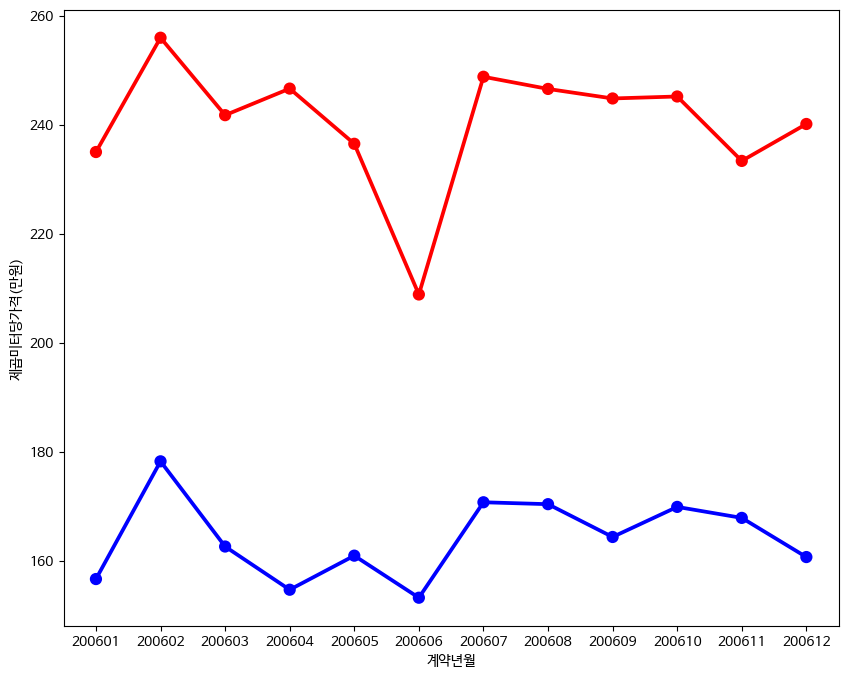

In [16]:
sns.pointplot(x=df1['계약년월'], y=df1['제곱미터당가격(만원)'], errorbar=('ci', 0), color='#FF0000')
sns.pointplot(x=df2['계약년월'], y=df2['제곱미터당가격(만원)'], errorbar=('ci', 0), color='#0000FF')